# Aufgabe 4: Öffnungsfehler plankonvexe Linse (10$\,$pt) ***

Bestimmung der Öffnungsfehler einer plankonvexen Linse mit Hilfe eines Computerprogramms.

Nehmen Sie dazu an, dass Licht, ausgehend von einem Punkt auf der optischen Achse bei $z_0 = -40\,\text{cm}$, bei $z_L=0$ erst auf die planare Linsenseite einfällt. Die konvexe Seite, gegeben über $R^2 = z^2 + x^2$ mit dem Linsenradius $R = 10\,\text{cm}$, wird dann anschließend von den Strahlen getroffen. Das Linsenglas hat einen Brechnungsindex von $n = 1,5$.

Beachten Sie, dass gemäß der Konvention (s.h. Skript und die gegeben Plottingvorlage) hier die Optischeachse der z-Achse entspricht und die Meridionalebene parallel zur x-Achse liegt.

**a)**
Bestimmen Sie die Lage der Beiden Hauptebenen $h_1$ und $h_2$, sowie die Bildebene für einen Gegenstand bei $z_0$ in der paraxialen Näherung

**b)** Bestimmen Sie für die Bildebene die Koeffizenten $A_2$ und $B_4$ für die Reihenentwicklung der Abbildungsfehler (Gl. 2.122 im Skript).


Reichen Sie das *Jupyer Notebook* zusammen mit den anderen Aufgaben im moodle ein!

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Konstanten

In [2]:
R = 10 # Linsenradius [cm]

zstart = -40 #[cm] max plotting range
zstop = 60 #[cm]
n = 1.5 # Brechungsindex

g = 40. # Gegenstandsweite [cm]

Folgende Zelle ist nur für das Plotten der Linse notwendig

In [3]:
xL_max = np.sqrt(R**2)
xL_min = -np.sqrt(R**2)

xL = np.linspace(xL_min, xL_max, 1000+1)
zL = np.sqrt(R**2-xL**2)

Die beiden Funktionen wandeln $^{\circ}$ in *rads* um und umgekehrt

In [4]:
def degreeToRad(phi):
    return phi/180.*np.pi

def radToDegree(phi):
    return phi/np.pi*180.

**a)** Hauptebenen, Brenn- und Bildweiten Berechnung

In [5]:
f = R/(n-1) # via Linsenschleifergleichung [cm]

h1 = -(n-1.)/n * f*R/R # [cm] Hauptebene 1
h2 = 0 # [cm] Hauptebene 2

b = 1./(1./f - 1./(g-h1)) # [cm]

print("h1 = %.2f cm"%h1)
print("h2 = %.2f cm"%h2)

# h1 und h2 beziehen sich nach der Formel jeweils auf die Scheitelpunkte der Linse
# ihre z-koordinate im koordinatensystem sind daher:
h1 = 0-h1
h2 = R + h2

h1 = -6.67 cm
h2 = 0.00 cm


**b)** 
### Strahlen
Bestimmen sie die drei auftretetenen Teilstrahlen über deren Start- und Endpunkte als Funktionen von dem jeweils relevanten Winkel.

Der Endpunkt des zweiten Teilstücks ist gegeben über $R^2 = x^2 + z^2$ mit $x = c+m \cdot z$.

#### Lösung:
$$x(z) = (z-z_0) \tan \alpha$$ 
$$x_1 = x(z_1=0) = -z_0 \tan \alpha$$

In [6]:
# nimmt z0 und Öffnungswinkel alpha (in radians)
def start_stop_einlaufender_strahl(z0, alpha):
    x1 = -z0*np.tan(alpha)
    narray = np.full(len(alpha), 0.0)
    return np.full(len(alpha), z0), narray, narray, x1
# gibt (zstart, zend, xstart, xend)

#### Lösung:
$$z_2 = \frac{1}{1+\tan^2 \beta} \left( -x_1 \tan \beta + \sqrt{x_1^2 \tan^2 \beta + (R^2 - x_1^2)\cdot(1+\tan^2 \beta)} \right)$$

mit $\sin \beta = \frac{1}{n} \sin \alpha$ (Snellius; erste Brechung)

In [7]:
# nimmt den Eintrittspunkt z1, x1 und Öffnungswinkel alpha (in radians)
def start_stop_linsen_strahl(z1, x1, alpha):
    beta = np.arcsin(1/n * np.sin(alpha))
    tb = np.tan(beta)
    
    z2 = - x1*tb + np.sqrt((x1*tb)**2 + (R**2 - x1**2)*(1+tb**2))
    z2 /= 1+tb**2
    
    x2 = x1 + z2*tb
    
    return z1, z2, x1, x2, beta
# gibt (z1, z2, x1, x2, beta), wobei (z2, x2) = Austrittspunkt und der Brechungswinkel beta

#### Lösung:
Der Lotwinkel zur Optischenachse ist $\varphi = \arctan\left( \frac{x_2}{z_2} \right)$ und der Strahlwinkel zum Lot ist $\gamma = \varphi - \beta$.

Der Brechungswinkel $\delta$ ist gegeben via $\sin \delta = n \sin \gamma$ (Snellius; zweite Brechung).

Bezeichnen wir den Winkel des gebrochenen auslaufenden Strahls zur optischen Achse als $\epsilon$ (positiv gegen Uhrzeigersinn), dann ist:

$$ \epsilon = \beta + \gamma - \delta$$

In [8]:
# nimmt den Austrittspunkt z2, x2 und Öffnungswinkel alpha (in radians)
def start_stop_auslaufender_strahl(z2, x2, beta):
    gamma = np.arctan(x2/z2) - beta
    delta = np.arcsin(n*np.sin(gamma))
    epsilon = beta+gamma-delta
    x3 = x2+(b+h2-z2)*np.tan(epsilon)
    return z2, np.full(len(z2), b+h2), x2, x3
# gibt (z2, b, x2, x3), wobei (b, x3) der Treffpunkt auf der Bildebene ist

Bündelstrahlen für verschiedene Öffnungswinkel:

In [9]:
alphas = degreeToRad(np.linspace(-4, 4, 16*2+1)) # [rads]

z1, z2, x1, x2 = start_stop_einlaufender_strahl(-g, alphas)
z2, z3, x2, x3, beta = start_stop_linsen_strahl(z2, x2, alphas)
z3, z4, x3, x4 = start_stop_auslaufender_strahl(z3, x3, beta)

### Strahlplotting

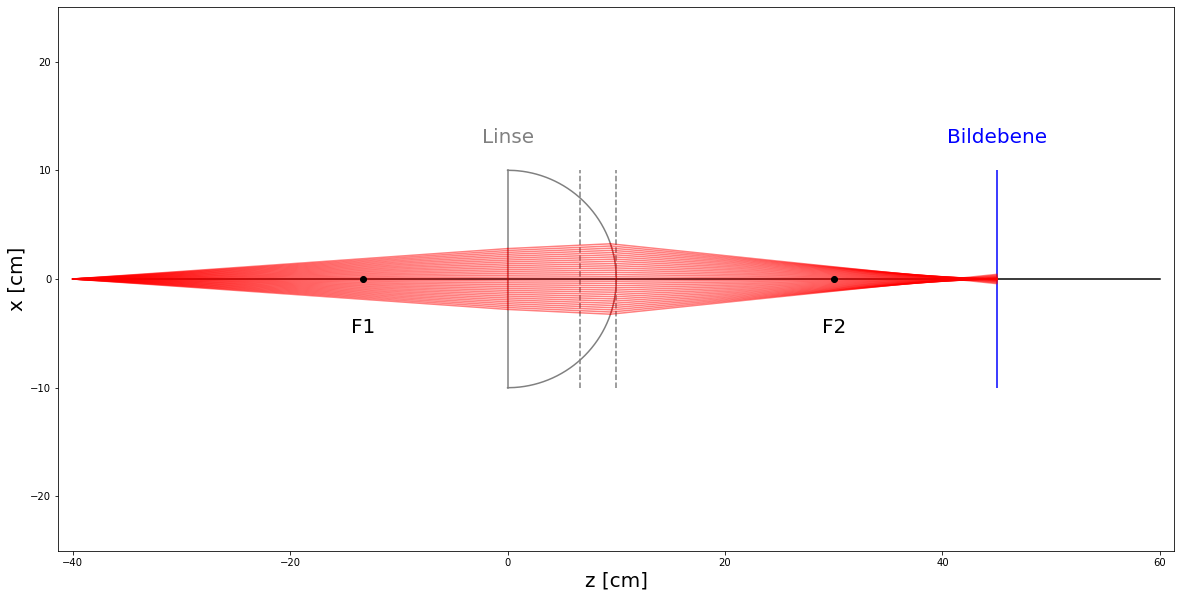

In [10]:
plt.figure(figsize=(20,10))

# Achsen
plt.axis("equal")
plt.xlim(zstart, zstop)
plt.ylim(-25, 25)
plt.xlabel("z [cm]", size=20)
plt.ylabel("x [cm]", size=20)

# Linse + Optischeachse
plt.text(0, R+R/4, "Linse", fontsize=20, color="gray", horizontalalignment="center")
plt.plot(zL, xL, color="gray")
plt.plot([0, 0], [xL_min, xL_max], color="gray")
plt.plot([zstart, zstop], [0, 0], color="black")

# Brennpunkte
plt.scatter([-f+h1, f+h2], [0, 0], color="black", zorder=1000)
plt.text(-f+h1, -R/2, "F1", fontsize=20, color="black", horizontalalignment="center",)
plt.text(f+h2, -R/2, "F2", fontsize=20, color="black", horizontalalignment="center")

# Bildebene
plt.text(b+h2, R+R/4, "Bildebene", fontsize=20, color="blue", horizontalalignment="center")
plt.vlines(b+h2, -R, R, color="blue")

# Hauptebenen
plt.vlines(+h1, -R, R, color="gray", linestyle="--")
plt.vlines(R, -R, R, color="gray", linestyle="--")


# Strahlenbündel
for i in range(z1.shape[0]):
    plt.plot([z1[i], z2[i]], [x1[i], x2[i]], color="red", alpha=0.5)
    plt.plot([z2[i], z3[i]], [x2[i], x3[i]], color="red", alpha=0.5)
    plt.plot([z3[i], z4[i]], [x3[i], x4[i]], color="red", alpha=0.5)

### Koeffizienten

In [11]:
alphas_grad = radToDegree(alphas)
Npol = 3
paras = np.polyfit(alphas_grad, x4, Npol) # y = p[0] * x^3 +p[1] *x^2 + p[2] * x^1 + p[3]

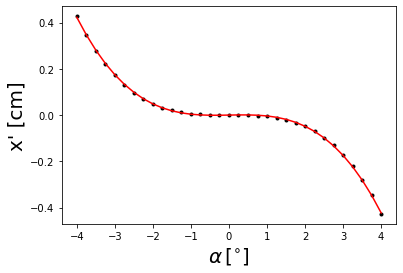

In [12]:
plt.figure()
plt.xlabel(r"$\alpha \, [{}^{\circ}]$", size=20)
plt.ylabel("x' [cm]", size=20)
plt.scatter(alphas_grad, x4, color="black", marker=".")
plt.plot(alphas_grad, np.poly1d(paras)(alphas_grad), color="red")

In [13]:
print("A2 = %.4f cm grad^-1" % paras[Npol-1])
print("B4 = %.4f cm grad^-3" % paras[Npol-3])

A2 = 0.0030 cm grad^-1
B4 = -0.0068 cm grad^-3


### Was ist mit p[1] und p[3]?

Sind aus der Symmetrie 0 ($\alpha \rightarrow -\alpha$)!

### Was passiert mit $A_2$ für eine dünne Linse?

$A_2 \xrightarrow{d \rightarrow 0} 0$